GRIP : The Sparks Foundation


Data Science and Business Analytics Intern


Created By : Abhishek Kumar Pandey

Task 1 : Prediction Using Supervised ML

In this Task we have to predict the percentage score of a student based on the number of hours studied.it has two variables which is number of hours studied and the target value in the percentage score .this can be solved using linear regression

In [11]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading Data from URL

In [12]:
url="http://bit.ly/w-data"
data=pd.read_csv(url)

Exploring Data:

In [13]:
print(data.shape)

(25, 2)


In [14]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [15]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


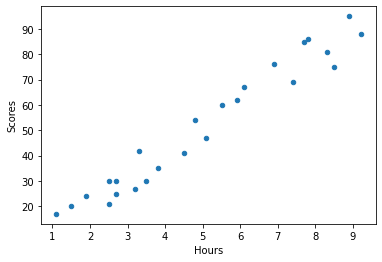

In [17]:
data.plot(kind='scatter',x='Hours',y='Scores');
plt.show()

In [26]:
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [27]:
data.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [28]:
hours=data['Hours']
scores=data['Scores']

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


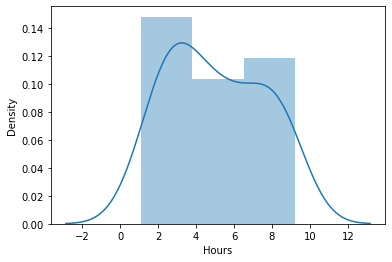

In [29]:
sns.distplot(hours)

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


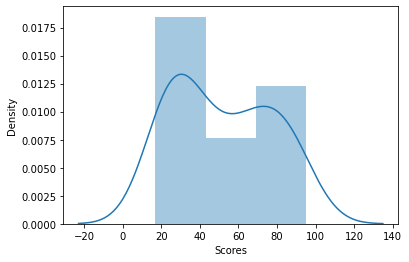

In [30]:
sns.distplot(scores)

 Linear Regression

In [31]:
X=data.iloc[:,:-1].values
y=data.iloc[:, 1].values

In [32]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [33]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

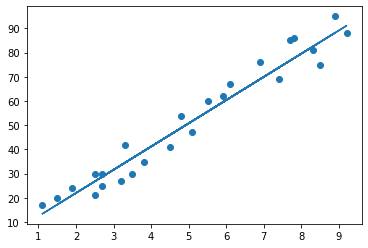

In [34]:
m=reg.coef_
c=reg.intercept_
line=m*X+c
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [35]:
y_pred=reg.predict(X_test)

In [36]:
actual_predicted=pd.DataFrame({'Target':y_test,'Predicted':y_pred})
actual_predicted

,Target,Predicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


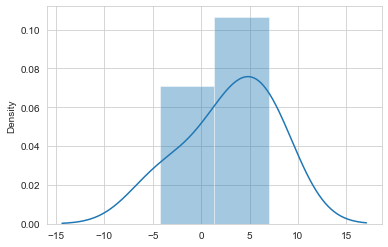

In [37]:
sns.set_style('whitegrid')
sns.distplot(np.array(y_test-y_pred))
plt.show()

What would be the predicted score if the student studies for 9.25 hours/day?

In [38]:
h =9.25
s=reg.predict([[h]])
print("if the student studies for {} hours per day he/she will score {} % in exam".format(h,s))

if the student studies for 9.25 hours per day he/she will score [91.56986604] % in exam


Model Evaluation

In [39]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('mean absolute error: ',metrics.mean_absolute_error(y_test, y_pred))
print('r2_score: ',r2_score(y_test,y_pred))

mean absolute error:  4.5916495300630285
r2_score:  0.971014141329942
